<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 200px; display: inline" alt="IMT"/> </a>
</center>

# [Ateliers: Technologies des grosses data](https://github.com/wikistat/Ateliers-Big-Data)

# [Reconnaissance d'Activité Humaine](https://github.com/wikistat/Ateliers-Big-Data/5-HumanActivityRecognition) ([HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)) en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>
##  Première étape:  étude des variables "métier"

## 1 Introduction
### 1.1 Contexte
Les données sont issues de la communauté qui vise la reconnaissance d'activités humaines (*Human activity recognition, HAR*) à partir d’enregistrements, par exemple du gyroscope et de l'accéléromètre d'un smartphone, objet connecté précurseur et dont la fonctionnalité de téléphonie devient très secondaire.
Voir à ce propos l'[article](https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf) relatant un colloque de 2013.  

Les données publiques disponibles et largement étudiées ont été acquises, décrites et analysées par [Anguita et al. (2013)]().
Elles sont accessibles sur le [dépôt](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) de l'University California Irvine (UCI) consacré à l'apprentissage machine ainsi que sur le site *Kaggle*.

L'archive contient les données brutes: accélérations en x, y, et z, chacun de 128 colonnes. D'autres fichiers en y soustrayant la gravité naturelle ainsi que les accélérations angulaires en x, y, et z soit en tout 9 fichiers. Mais 6 utiles avec 6*128=768 mesures.

Elle contient également deux fichiers "train" et "test" de *features* ou variables métier calculées dans les domaines temporels et fréquentiels: 561 variables.

Les données sont labellisées avec 6 activités: debout, assis, couché, marche, monter ou descendre un escalier. Il s'agit donc, en première lecture, d'un problème de classification supervisée (6 classes) avec 10299 observations (apprentissage  et trest) décrites par 561 variables.

### 1.2 Objectifs
Cette première étape s'intéresse aux seules variables construites à partir des connaissances *a priori* du comportement des capteurs en fonction des types d'activité humaine. Ce premier calepin propose une exploration et une modélisation, sans effort d'optimisation (paramètres par défaut), des 561 variables métier. Quelle méthode ou algorihtme d'apprentissage permet de déterminer au mieux l'activité humaine? 

Une deuxième étape à venir s'intéresse aux données brutes. Est-il possible d'économiser le travail préliminaire de définition des variables métier en utilisant par exemple les ressources de décompositions systématiques sur une base d'ondelette ou un algorihtme d'apprentissage profond?

### 1.3 Travail à réaliser
- Exploration avec notamment une analyse en composantes principales
- Modélisation, prévision de l'échantillon test par
   - régression logistique
   - $k$ plus proches voisins
   - SVM
   - Random Forest
   - Gradient boosting
   - XGBoost
   - Réseau de neurones
- Ajouter à ce calepin: optimisation des paramètres des différentes méthodes

## 2 Lecture des données d'apprentissage

In [1]:
# Graphiques dans la fenêtre
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Les données peuvent être préalablement téléchargées ou directement lues. Ce sont celles originales du dépôt de l'[UCI](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). 

In [3]:
# Lecture des données d'apprentissage
# Attention, il peut y avoir plusieurs espaces comme séparateur
Xtrain=pd.read_table("X_train.txt",sep='\s+',header=None)
Xtrain.head()

0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9      ...          551       552       553  \
0 -0.983185 -0.923527 -0.934724    ...    -0.074323 -0.298676 -0.710304   
1 -0.974914 -0.957686 -0.943068    ...     0.158075 -0.595051 -0.861499   
2 -0.963668 -0.977469 -0.938692    ...     0.414503 -0.390748 -0.760104   
3 -0.982750 -0.989302 -0.938692    ...     0.404573 -0.117290 -0.482845   
4 -0.979672 -0.990441 -0.942469    ...     0.087753 -0.351471 -0.699205   

        554       555       556       557       558       559       560  
0 -0.112754  0.030400 -0.464761 -0.018446 -0.841247  0.179941 -0.058627  
1  0.053477 -0.007435 -0.732626  0.703511 -0.844788  0.180289 -0.054317  
2 -0.118559  0.177899  0.100699  0.808529 -0.848933  0.180637 -0.049118  
3 -0.036788 -0.012892  0.640011 -0.485366 -0.848649  0.181935 -0.047663  
4  0.123320  0.122542  0.693578 -0.615971 -0.847865  0.185151 -0.043892  

[5 rows x 561 columns]

In [4]:
ytrain=pd.read_table("y_train.txt",sep='\s+',header=None,names=('y'))
ytrain.head()

y
0  5
1  5
2  5
3  5
4  5

In [17]:
# Lecture des données de test
# Attention, il peut y avoir plusieurs espaces comme séparateur
Xtest=pd.read_table("X_test.txt",sep='\s+',header=None)
Xtest.head()

0         1         2         3         4         5         6    \
0  0.257178 -0.023285 -0.014654 -0.938404 -0.920091 -0.667683 -0.952501   
1  0.286027 -0.013163 -0.119083 -0.975415 -0.967458 -0.944958 -0.986799   
2  0.275485 -0.026050 -0.118152 -0.993819 -0.969926 -0.962748 -0.994403   
3  0.270298 -0.032614 -0.117520 -0.994743 -0.973268 -0.967091 -0.995274   
4  0.274833 -0.027848 -0.129527 -0.993852 -0.967445 -0.978295 -0.994111   

        7         8         9      ...          551       552       553  \
0 -0.925249 -0.674302 -0.894088    ...     0.071645 -0.330370 -0.705974   
1 -0.968401 -0.945823 -0.894088    ...    -0.401189 -0.121845 -0.594944   
2 -0.970735 -0.963483 -0.939260    ...     0.062891 -0.190422 -0.640736   
3 -0.974471 -0.968897 -0.938610    ...     0.116695 -0.344418 -0.736124   
4 -0.965953 -0.977346 -0.938610    ...    -0.121711 -0.534685 -0.846595   

        554       555       556       557       558       559       560  
0  0.006462  0.162920 -0.825886  0.271151 -0.720009  0.276801 -0.057978  
1 -0.083495  0.017500 -0.434375  0.920593 -0.698091  0.281343 -0.083898  
2 -0.034956  0.202302  0.064103  0.145068 -0.702771  0.280083 -0.079346  
3 -0.017067  0.154438  0.340134  0.296407 -0.698954  0.284114 -0.077108  
4 -0.002223 -0.040046  0.736715 -0.118545 -0.692245  0.290722 -0.073857  

[5 rows x 561 columns]

In [18]:
ytest=pd.read_table("y_test.txt",sep='\s+',header=None,names=('y'))
ytest.head()

y
0  5
1  5
2  5
3  5
4  5

## 3 Exploration

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Fonction de représentation des plans factoriels

In [15]:
label_dic = {1 : "WALKING",
2 : "WALKING UPSTAIRS",
3 : "WALKING DOWNSTAIRS",
4 : "SITTING",
5 : "STANDING",
6 : "LAYING"}

def plot_pca(X_R,fig,ax,nbc,nbc2):
    for i in range(6):
        xs = X_r[ytrain["y"]==i+1,nbc-1]
        ys = X_r[ytrain["y"]==i+1, nbc2-1]
        label = label_dic[i+1]
        color = cmaps(i)
        ax.scatter(xs, ys, color=color, alpha=.8, s=1, label=label)
        ax.set_xlabel("PC%d : %.2f %%" %(nbc,pca.explained_variance_ratio_[nbc-1]*100), fontsize=10)
        ax.set_ylabel("PC%d : %.2f %%" %(nbc2,pca.explained_variance_ratio_[nbc2-1]*100), fontsize=10)

In [8]:
pca = PCA()
X_r = pca.fit_transform(Xtrain)

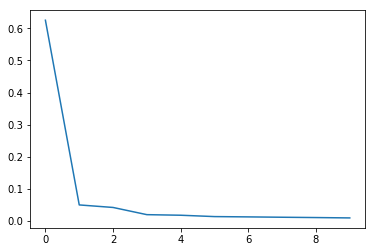

In [9]:
## Décroissance des premières valeurs propres
plt.plot(pca.explained_variance_ratio_[0:10])
plt.show()

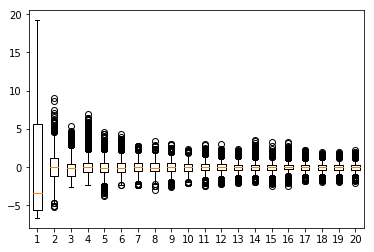

In [12]:
## distribution des premières composantes principales
plt.boxplot(X_r[:,0:20])
plt.show()

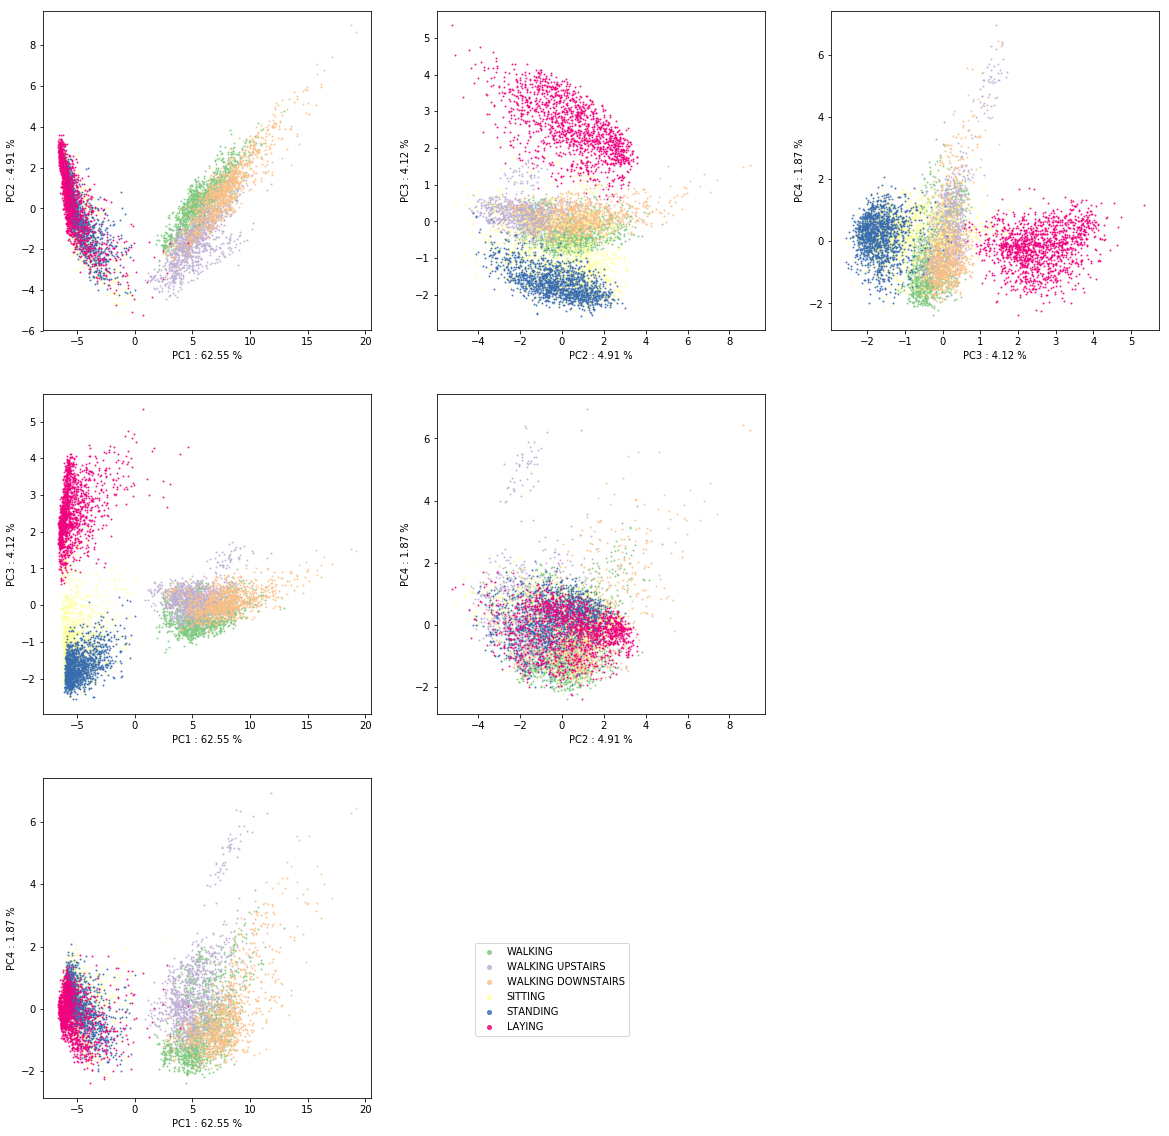

In [16]:
cmaps = plt.get_cmap("Accent")

fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(X_r, fig,ax,nbc,nbc2)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=4)

**Q** Commenter

**Q** Représenter les variables?

## 4 Apprentissage et prévision du test

In [30]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
ytrain=ytrain["y"]
ytest=ytest["y"]
LABELS = ["WALKING","WALKING UPSTAIRS","WALKING DOWNSTAIRS","SITTING","STANDING","LAYING"]

### 4.1 Régression logistique

In [54]:
ts = time.time()
method = LogisticRegression()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()

In [55]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.961995, time running : 7 secondes


WALKING  WALKING UPSTAIRS  WALKING DOWNSTAIRS  SITTING  \
WALKING                 494                 0                   2        0   
WALKING UPSTAIRS         23               448                   0        0   
WALKING DOWNSTAIRS        4                 9                 407        0   
SITTING                   0                 4                   0      432   
STANDING                  2                 0                   0       13   
LAYING                    0                 0                   0        0   

                    STANDING  LAYING  
WALKING                    0       0  
WALKING UPSTAIRS           0       0  
WALKING DOWNSTAIRS         0       0  
SITTING                   55       0  
STANDING                 517       0  
LAYING                     0     537

### 4.2 *K* plus proches voisins

In [49]:
method = KNeighborsClassifier(n_jobs=-1)
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [50]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.901595, time running : 140 secondes


WALKING  WALKING UPSTAIRS  WALKING DOWNSTAIRS  SITTING  \
WALKING                 485                 2                   9        0   
WALKING UPSTAIRS         40               424                   7        0   
WALKING DOWNSTAIRS       45                45                 330        0   
SITTING                   0                 3                   0      389   
STANDING                  0                 0                   0       37   
LAYING                    0                 0                   0        2   

                    STANDING  LAYING  
WALKING                    0       0  
WALKING UPSTAIRS           0       0  
WALKING DOWNSTAIRS         0       0  
SITTING                   99       0  
STANDING                 495       0  
LAYING                     1     534

### 4.3  Random forest

In [45]:
ts = time.time()
method = RandomForestClassifier(n_estimators=200,n_jobs=-1)
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [46]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.925687, time running : 9 secondes


WALKING  WALKING UPSTAIRS  WALKING DOWNSTAIRS  SITTING  \
WALKING                 481                 6                   9        0   
WALKING UPSTAIRS         31               433                   7        0   
WALKING DOWNSTAIRS       21                44                 355        0   
SITTING                   0                 0                   0      436   
STANDING                  0                 0                   0       46   
LAYING                    0                 0                   0        0   

                    STANDING  LAYING  
WALKING                    0       0  
WALKING UPSTAIRS           0       0  
WALKING DOWNSTAIRS         0       0  
SITTING                   55       0  
STANDING                 486       0  
LAYING                     0     537

### 4.4 *Gradient boosting*

In [57]:
ts = time.time()
method = GradientBoostingClassifier()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [58]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.937224, time running : 183 secondes


WALKING  WALKING UPSTAIRS  WALKING DOWNSTAIRS  SITTING  \
WALKING                 486                 5                   5        0   
WALKING UPSTAIRS         24               439                   7        1   
WALKING DOWNSTAIRS        7                26                 387        0   
SITTING                   0                 2                   0      415   
STANDING                  0                 0                   0       34   
LAYING                    0                 0                   0        0   

                    STANDING  LAYING  
WALKING                    0       0  
WALKING UPSTAIRS           0       0  
WALKING DOWNSTAIRS         0       0  
SITTING                   74       0  
STANDING                 498       0  
LAYING                     0     537

### 4.5 SVM

In [48]:
ts = time.time()
method = SVC()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [35]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.940278, time running : 19 secondes


WALKING  WALKING UPSTAIRS  WALKING DOWNSTAIRS  SITTING  \
WALKING                 492                 0                   4        0   
WALKING UPSTAIRS         17               452                   2        0   
WALKING DOWNSTAIRS       13                29                 378        0   
SITTING                   0                 2                   0      424   
STANDING                  0                 0                   0       44   
LAYING                    0                 0                   0        0   

                    STANDING  LAYING  
WALKING                    0       0  
WALKING UPSTAIRS           0       0  
WALKING DOWNSTAIRS         0       0  
SITTING                   65       0  
STANDING                 488       0  
LAYING                     0     537

## 5 Travail à réaliser
### 5.1 Sur les mêmes données
- Tester `XGBoost`
- Tester l'apprentissage profond avec `keras`
- **Optimiser** les paramètres

### 5.2 Deuxième étape sur les données brutes
- Apprentissage sur les décompositons en ondelettes
- Apprentissage profond 